In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_bgr = cv2.imread("/content/drive/MyDrive/Images/5/monalisa.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

In [ ]:
def get_gaussian_pyramid(image, steps, gray=False):
  if gray:
    R, C = image.shape
    gaussian_pyramid = np.full((R, ((3 * C) // 2) + 1), 255)
  else:
    R, C, Ch = image.shape
    gaussian_pyramid = np.full((R, ((3 * C) // 2) + 1, Ch), 255)
  gaussian_pyramid[0:R, 0:C] = image.copy()

  gaussian_levels = [image.copy()]
  current_level = image.copy()
  previouse_row = 0

  for step in range(steps):
    current_level = cv2.pyrDown(current_level)

    current_row, current_col = current_level.shape[0:2]
    gaussian_pyramid[previouse_row:previouse_row + current_row, C:C + current_col] = current_level

    gaussian_levels.append(current_level)
    previouse_row += current_row

  return gaussian_pyramid, gaussian_levels

Text(0.5, 1.0, 'Pyramid: Gaussian')

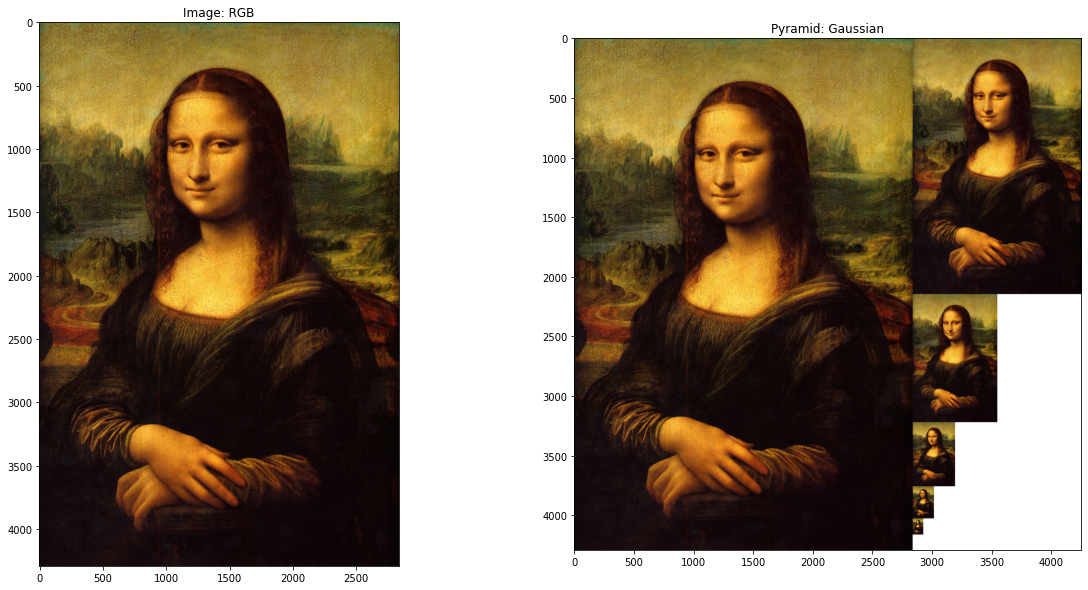

In [ ]:
gaussian_pyramid, gaussian_levels = get_gaussian_pyramid(img_rgb, 5)

fig, plot = plt.subplots(1, 2, figsize = (20, 10))

plot[0].imshow(img_rgb)
plot[0].set_title("Image: RGB")

plot[1].imshow(gaussian_pyramid)
plot[1].set_title("Pyramid: Gaussian")

In [ ]:
def get_laplacian_pyramid(gaussian_levels, steps, gray=False):
  laplacian_levels = [gaussian_levels[-1]]

  for step in range(steps - 1, -1, -1):
    gaussian_row, gaussian_col = gaussian_levels[step].shape[0:2]
    gaussian_expanded = cv2.pyrUp(gaussian_levels[step + 1], dstsize=(gaussian_col, gaussian_row))

    laplacian = cv2.subtract(gaussian_levels[step], gaussian_expanded)
    laplacian = laplacian * 255.0 // np.max(laplacian)
    laplacian_levels.append(laplacian)

  if gray:
    R, C = laplacian_levels[steps].shape
    laplacian_pyramid = np.full((R, ((3 * C) // 2) + 1), 255)
  else:
    R, C, Ch = laplacian_levels[steps].shape
    laplacian_pyramid = np.full((R, ((3 * C) // 2) + 1, Ch), 255)
  laplacian_pyramid[0:R, 0:C] = laplacian_levels[steps]
  previouse_row = 0

  for step in range(steps - 1, -1, -1):
    current_level = laplacian_levels[step]

    current_row, current_col = current_level.shape[0:2]
    laplacian_pyramid[previouse_row:previouse_row + current_row, C:C + current_col] = current_level

    previouse_row += current_row

  return laplacian_pyramid

Text(0.5, 1.0, 'Pyramid: Laplacian')

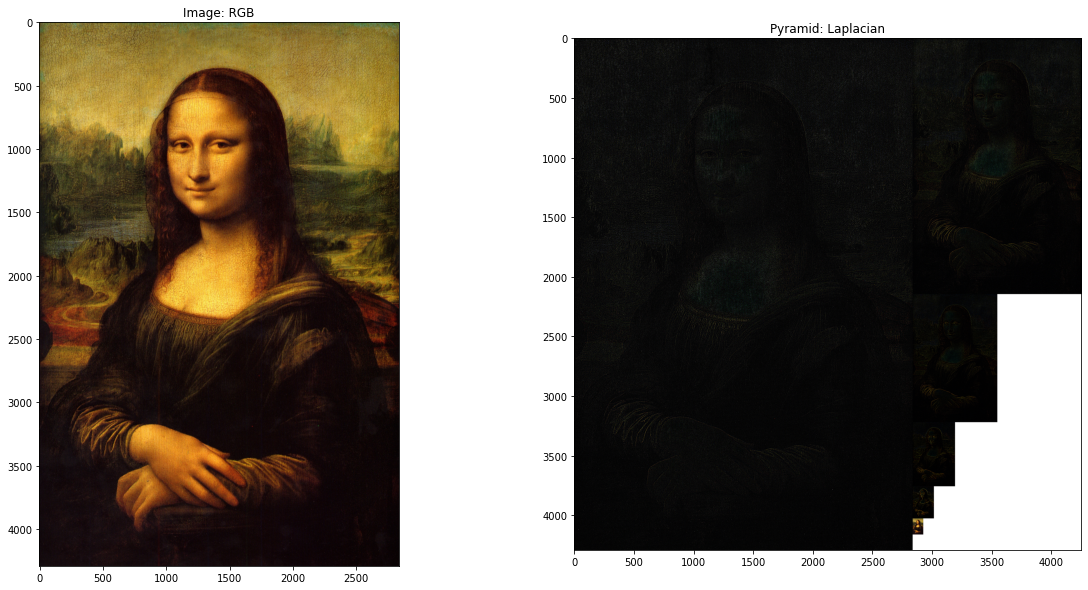

In [ ]:
laplacian_pyramid = get_laplacian_pyramid(gaussian_levels, 5)

fig, plot = plt.subplots(1, 2, figsize = (20, 10))

plot[0].imshow(img_rgb)
plot[0].set_title("Image: RGB")

plot[1].imshow(laplacian_pyramid)
plot[1].set_title("Pyramid: Laplacian")

In [ ]:
# Test with Lena for Better Results

img_bgr_lena = cv2.imread("/content/drive/MyDrive/Images/5/Lena.bmp")
img_rgb_lena = cv2.cvtColor(img_bgr_lena, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Pyramid: Gaussian')

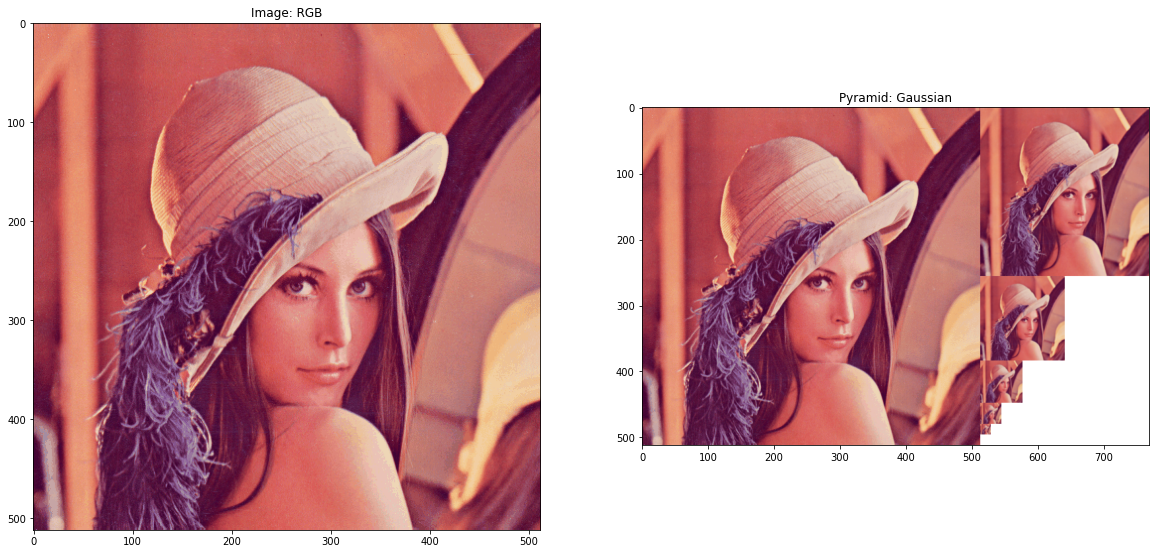

In [ ]:
# Gaussian

gaussian_pyramid_lena, gaussian_levels_lena = get_gaussian_pyramid(img_rgb_lena, 5)

fig, plot = plt.subplots(1, 2, figsize = (20, 10))

plot[0].imshow(img_rgb_lena)
plot[0].set_title("Image: RGB")

plot[1].imshow(gaussian_pyramid_lena)
plot[1].set_title("Pyramid: Gaussian")

Text(0.5, 1.0, 'Pyramid: Laplacian')

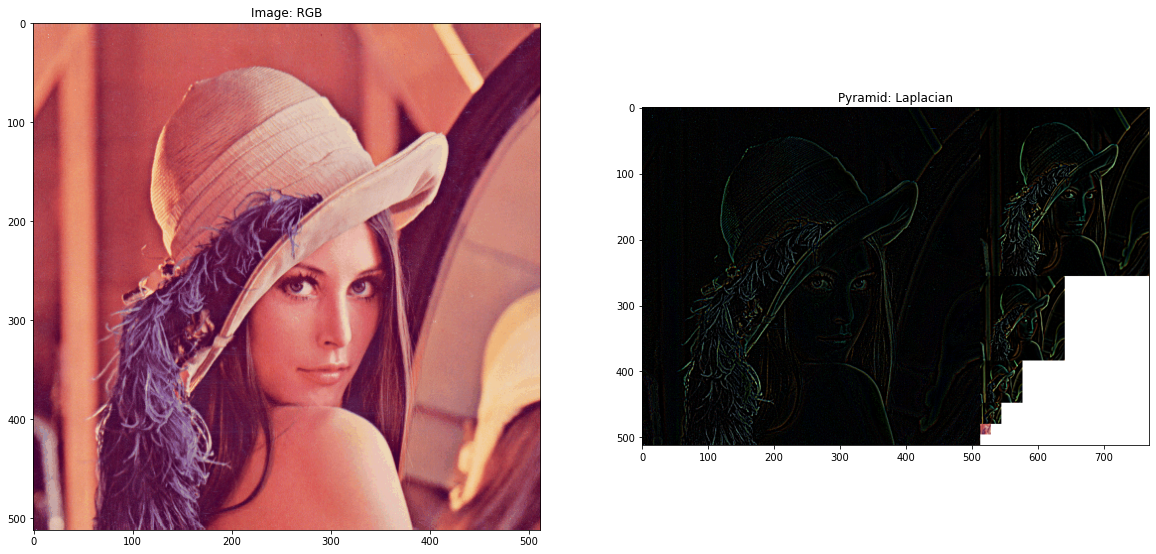

In [ ]:
# Laplacian

laplacian_pyramid_lena = get_laplacian_pyramid(gaussian_levels_lena, 5)

fig, plot = plt.subplots(1, 2, figsize = (20, 10))

plot[0].imshow(img_rgb_lena)
plot[0].set_title("Image: RGB")

plot[1].imshow(laplacian_pyramid_lena)
plot[1].set_title("Pyramid: Laplacian")

In [ ]:
# Test with Grayscale Mona Lisa for Better Results

img_gray_mona_lisa = cv2.imread("/content/drive/MyDrive/Images/5/monalisa.jpg", 0)

Text(0.5, 1.0, 'Pyramid: Gaussian')

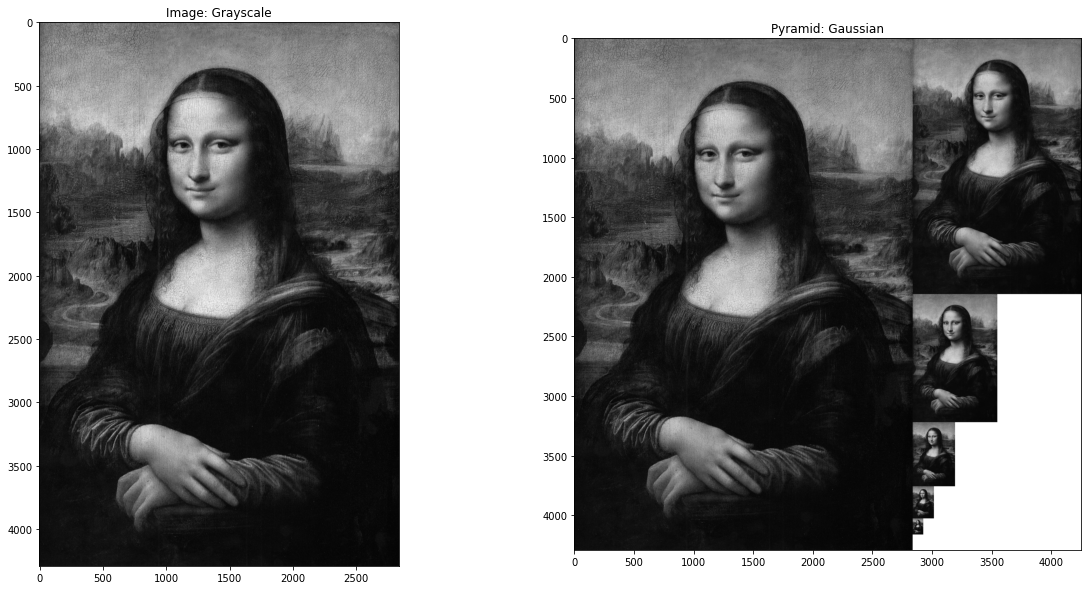

In [ ]:
# Gaussian

gaussian_pyramid_gray_mona_lisa, gaussian_levels_gray_mona_lisa = get_gaussian_pyramid(img_gray_mona_lisa, 5, True)

fig, plot = plt.subplots(1, 2, figsize = (20, 10))

plot[0].imshow(img_gray_mona_lisa, cmap='gray')
plot[0].set_title("Image: Grayscale")

plot[1].imshow(gaussian_pyramid_gray_mona_lisa, cmap='gray')
plot[1].set_title("Pyramid: Gaussian")

Text(0.5, 1.0, 'Pyramid: Laplacian')

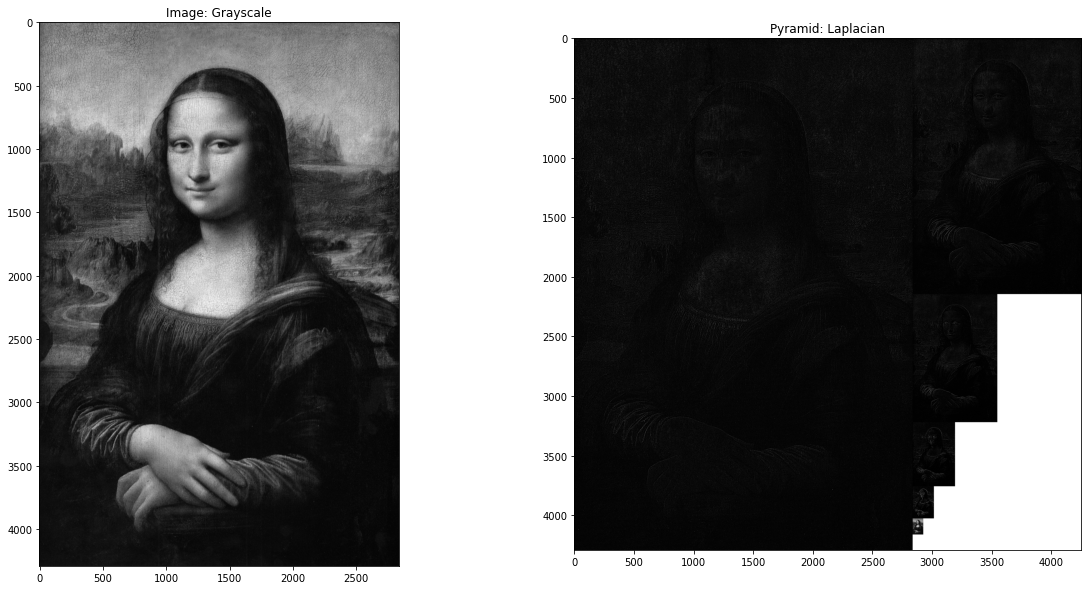

In [ ]:
# Laplacian

laplacian_pyramid_gray_mona_lisa = get_laplacian_pyramid(gaussian_levels_gray_mona_lisa, 5, True)

fig, plot = plt.subplots(1, 2, figsize = (20, 10))

plot[0].imshow(img_gray_mona_lisa, cmap='gray')
plot[0].set_title("Image: Grayscale")

plot[1].imshow(laplacian_pyramid_gray_mona_lisa, cmap='gray')
plot[1].set_title("Pyramid: Laplacian")